In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
economy = pd.read_csv('Economy.csv')

In [3]:
economy.head()

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition
0,Atlanta,GA,10.2,0.040,0.049,0.089,59345.0,10309.0
1,Austin,TX,6.3,0.063,0.020,0.083,65886.0,8729.0
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0
3,Birmingham,AL,NaN,4.050,0.060,0.100,NaN,NaN
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0


In [4]:
economy.dtypes

City                     object
State                    object
Percent unemployment    float64
State sale tax rate     float64
Local tax rate          float64
Total rate              float64
Median Income           float64
AvgTuition              float64
dtype: object

In [5]:
economy['Rank_Unemployment'] = economy['Percent unemployment'].rank(ascending = 1)
economy['Rank_Sales'] = economy['Local tax rate'].rank(ascending = 1)
economy['Rank_income'] = economy['Median Income'].rank(ascending = 1) 
economy['Rank_Tution'] = economy['AvgTuition'].rank(ascending = 0)
economy.head()

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition,Rank_Unemployment,Rank_Sales,Rank_income,Rank_Tution
0,Atlanta,GA,10.2,0.040,0.049,0.089,59345.0,10309.0,30.0,44.5,22.0,15.0
1,Austin,TX,6.3,0.063,0.020,0.083,65886.0,8729.0,4.0,27.5,29.0,21.5
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0,34.5,4.5,10.0,10.0
3,Birmingham,AL,NaN,4.050,0.060,0.100,NaN,NaN,NaN,47.0,NaN,NaN
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0,6.0,4.5,25.0,1.0


In [6]:
economy['Rank_Unemployment'].fillna(economy['Rank_Unemployment'].max() + 1, inplace=True)
economy['Rank_Sales'].fillna(economy['Rank_Sales'].max() + 1, inplace=True)
economy['Rank_income'].fillna(economy['Rank_income'].max() + 1, inplace=True)
economy['Rank_Tution'].fillna(economy['Rank_Tution'].max() + 1, inplace=True)

In [7]:
economy['Sum'] = (economy['Rank_Unemployment'] + economy['Rank_Sales'] + 
                  economy['Rank_income'] + economy['Rank_Tution'])

In [8]:
economy.dtypes

City                     object
State                    object
Percent unemployment    float64
State sale tax rate     float64
Local tax rate          float64
Total rate              float64
Median Income           float64
AvgTuition              float64
Rank_Unemployment       float64
Rank_Sales              float64
Rank_income             float64
Rank_Tution             float64
Sum                     float64
dtype: object

In [9]:
economy['Economy_rank'] = economy['Sum'].rank(ascending = 0)

In [10]:
economy 

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition,Rank_Unemployment,Rank_Sales,Rank_income,Rank_Tution,Sum,Economy_rank
0,Atlanta,GA,10.2,0.040,0.049,0.089,59345.0,10309.0,30.0,44.5,22.0,15.0,111.5,14.0
1,Austin,TX,6.3,0.063,0.020,0.083,65886.0,8729.0,4.0,27.5,29.0,21.5,82.0,34.0
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0,34.5,4.5,10.0,10.0,59.0,47.0
3,Birmingham,AL,NaN,4.050,0.060,0.100,NaN,NaN,35.5,47.0,36.0,38.0,156.5,4.0
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0,6.0,4.5,25.0,1.0,36.5,50.0
5,Buffalo,NY,NaN,0.040,0.048,0.088,NaN,16305.0,35.5,42.5,36.0,2.5,116.5,9.0
6,Charlotte,NC,9.9,0.048,0.025,0.073,65622.0,NaN,29.0,34.0,28.0,38.0,129.0,5.0
7,Chicago,IL,9.8,0.063,0.040,0.103,56121.0,7844.0,27.5,38.5,15.0,28.0,109.0,17.0
8,Cincinnati,OH,7.2,0.058,0.013,0.070,49048.0,6304.0,9.5,21.0,9.0,33.0,72.5,43.5
9,Cleveland,OH,7.9,0.058,0.023,0.080,35685.0,6304.0,17.0,32.0,1.0,33.0,83.0,33.0


In [11]:
economy.to_csv('Economy_Rank.csv')

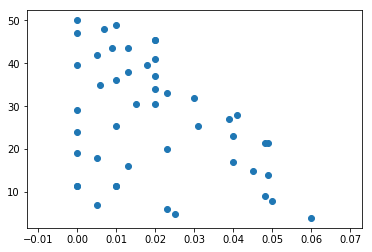

In [12]:
#Basic Graph Analysis
%matplotlib inline  
plt.scatter(economy['Local tax rate'],economy['Economy_rank'])

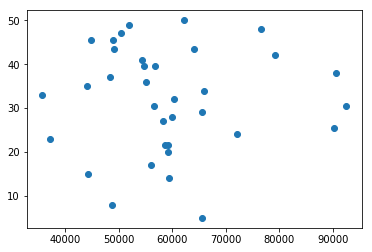

In [13]:
plt.scatter(economy['Median Income'], economy['Economy_rank'])

In [14]:
#Get the Geodata
import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim()
n = len(economy)
cname = []
for i in range(0, n):
    cname.append(economy['City'][i])
b = []
c = []
for j in range(0, n):
    city = cname[j] 
    loc = geolocator.geocode(city + ' United States')
    b.append(loc.latitude)
    c.append(loc.longitude)
economy['Lat'] = b
economy['Lon'] = c
economy.to_csv('economy_loc.csv')

In [19]:
#Geo plotting
import plotly
import plotly.plotly as py
import pandas as pd

df = economy
df.head()

# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

def combine(ls):
    text = ls[0] + ':' + str(int(ls[1]))
    return text


for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = economy['Lon'],
        lat = economy['Lat'],
        text = economy[['City','Economy_rank']].apply(combine,axis=1),
        marker = dict(
            size = economy['Economy_rank']*50,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = 'City Ranking by Economy',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-bubble-map-populations.html' )

'file://C:\\Users\\dell\\Documents\\cse583\\Homework\\d3-bubble-map-populations.html'